In [2]:
import pandas as pd
import numpy as np


In [3]:
train_region = "SanDiego"
test_region = "Austin"
appliance = "hvac"
feature = "Monthly"
strategy_list = ["None","CDD","median-aggregate"][:]
import glob

In [51]:
out = {}
for train_region in ["Austin"]:
    for strategy in strategy_list:
        try:
            directory = '../data/output/cross/%s_%s_%s_%s_%s/' % (train_region, 
                                                                    test_region,
                                                                     strategy,
                                                                    appliance,

                                                                   feature)
            home_files = glob.glob(directory+"*.csv")
            out[strategy] = {}
            homes = []
            for home_file in home_files:
                home = int(home_file.split("/")[-1][:-4])
                homes.append(home)
                df = pd.read_csv(home_file, index_col=0, header=None).squeeze()
                df.index.name = "Month"
                out[strategy][home]=df
        except:
            pass

In [53]:
for strategy in ['None']:
    print strategy, pd.DataFrame(out[strategy]).T.describe()

 None Month          7          8          9
count  75.000000  75.000000  75.000000
mean   71.776474  72.043512  71.672302
std    26.389427  25.097198  24.315080
min     0.000000   0.000000   0.000000
25%    67.697537  68.169101  62.386509
50%    80.580559  79.691417  77.879811
75%    87.467709  89.803283  88.318212
max    99.484391  97.582407  99.810983


In [45]:
acc={strategy:pd.DataFrame(out[strategy]).mean(axis=1) for strategy in strategy_list}




In [46]:
%matplotlib inline

In [83]:
acc_df = pd.DataFrame(acc)
#acc_df.plot(kind="bar",rot=0)
acc_df
acc_df

,CDD,None,median-aggregate
Month,,,
7,71.054210,62.707704,58.593951
8,70.592257,61.967676,66.618140
9,58.666374,68.680513,69.847450


In [84]:
acc_df['Train on Austin'] = pd.Series({7:72,8:72,9:72})

In [85]:
acc_df = acc_df.rename(columns={'None':'Train on SD, No transformation'})

In [86]:
acc_df = acc_df.rename(columns={'CDD':'Train on SD, Transformation by CDD'})

In [87]:
acc_df = acc_df.rename(columns={'median-aggregate':'Train on SD, Transformation by median'})

In [88]:
acc_df.columns

Index([u'Train on SD, Transformation by CDD',
       u'Train on SD, No transformation',
       u'Train on SD, Transformation by median', u'Train on Austin'],
      dtype='object')

In [89]:
acc_df = acc_df[['Train on SD, No transformation','Train on SD, Transformation by CDD',
                 'Train on SD, Transformation by median','Train on Austin']]

In [91]:
import sys
sys.path.append("../code/")

In [95]:
from common_functions import tableau20blind, format_axes

In [100]:
acc_df['Regional average'] = pd.Series({7:46, 8:42, 9:51})

In [103]:
acc_df = acc_df[['Regional average', u'Train on SD, No transformation',
       u'Train on SD, Transformation by CDD',
       u'Train on SD, Transformation by median', u'Train on Austin']]

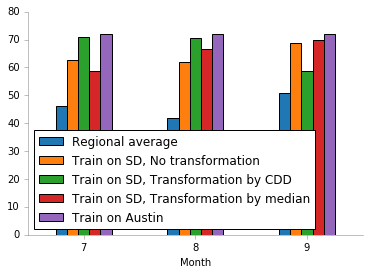

In [104]:
import matplotlib.pyplot as plt
acc_df.plot(kind="bar",rot=0, colors=tableau20blind[::2]).legend(loc=3)
format_axes(plt.gca())
plt.savefig("../results/cross_hvac_sd_austin.pdf")
plt.savefig("../results/cross_hvac_sd_austin.png")